IMPORTAÇÕES

In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

PLANILHAS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
focos_mensal_dados = pd.read_csv("dados/focos_mensal_br_202401.csv")
display(focos_mensal_dados)

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152580,5cad2765-a458-32b2-8f09-904e1e300a39,-23.4655,-55.0521,2024-01-31 23:27:16,GOES-16,AMAMBAI,MATO GROSSO DO SUL,Brasil,5000609,50,33,8,0.00,0.49,Mata Atlântica,85.1
152581,75e7094f-ff20-33c3-b009-7a010507007f,-13.6579,-60.6528,2024-01-31 23:36:24,GOES-16,COMODORO,MATO GROSSO,Brasil,5103304,51,33,0,2.91,0.64,Amazônia,70.1
152582,66db7fa8-a99a-3f5b-a47a-a11766d4b493,-18.0021,-57.4619,2024-01-31 23:36:47,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,0.00,-999.00,Pantanal,65.0
152583,b1e0748c-7533-3d2b-b0c4-8d3984359a97,-23.4655,-55.0521,2024-01-31 23:37:16,GOES-16,AMAMBAI,MATO GROSSO DO SUL,Brasil,5000609,50,33,8,0.00,0.49,Mata Atlântica,99.8


In [6]:
display(focos_mensal_dados.head(10))
print(focos_mensal_dados.shape)
display(focos_mensal_dados.describe())

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.566700,-41.436400,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.566200,-41.461100,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.062900,-57.372100,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.082300,-57.390200,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.082300,-57.390200,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
5,8e623aed-a897-3333-9272-6023f05d7c8b,-18.062900,-57.372100,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.3
6,10b6d241-5f2c-3fca-ae58-f4a61bebcf53,-16.157301,-39.203999,2024-01-01 00:17:05,METOP-B,SANTA CRUZ CABRÁLIA,BAHIA,Brasil,2927705,29,33,0,0.00,0.22,Mata Atlântica,NaN
7,a3e8b285-b4b3-36d5-95fd-9179451c3fd2,-16.155701,-39.196701,2024-01-01 00:17:05,METOP-B,SANTA CRUZ CABRÁLIA,BAHIA,Brasil,2927705,29,33,0,0.00,0.14,Mata Atlântica,NaN
8,2e52a777-38ad-377f-9363-1cb1ee56c2ee,-15.536100,-39.238701,2024-01-01 00:17:15,METOP-B,SANTA LUZIA,BAHIA,Brasil,2928059,29,33,1,0.00,0.82,Mata Atlântica,NaN
9,80c5ef9a-8ba6-3693-9b6e-f3797a6b651c,-15.460300,-39.087200,2024-01-01 00:17:16,METOP-B,SANTA LUZIA,BAHIA,Brasil,2928059,29,33,10,0.00,0.17,Mata Atlântica,NaN


(152585, 16)


,lat,lon,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,frp
count,152585.000000,152585.000000,1.525850e+05,152585.000000,152585.0,152585.000000,152585.000000,152585.000000,149617.000000
mean,-9.044794,-52.460539,3.058016e+06,30.524259,33.0,-21.168568,1.313675,-21.743525,34.748248
std,8.728927,8.259080,1.559057e+06,15.581678,0.0,162.053543,4.676683,147.221786,48.591340
min,-33.715350,-73.134100,1.100015e+06,11.000000,33.0,-999.000000,0.000000,-999.000000,0.000000
25%,-17.458240,-59.619840,1.400704e+06,14.000000,33.0,2.000000,0.000000,0.040000,4.500000
50%,-9.097880,-55.756640,2.609204e+06,26.000000,33.0,4.000000,0.000000,0.270000,10.300000
75%,-1.528550,-45.456840,5.003207e+06,50.000000,33.0,7.000000,0.300000,0.910000,63.500000
max,5.138240,-34.812980,5.300108e+06,53.000000,33.0,38.000000,230.900000,1.000000,1933.800000


In [27]:
risco_fogo = focos_mensal_dados[['risco_fogo','municipio','estado']].drop_duplicates(subset=['municipio']).head(10)
display(risco_fogo.describe())
display(risco_fogo.head(10))

,risco_fogo
count,10.000000
mean,0.381000
std,0.295012
min,0.000000
25%,0.167500
50%,0.380000
75%,0.635000
max,0.820000


,risco_fogo,municipio,estado
0,0.70,LENÇÓIS,BAHIA
2,0.00,CORUMBÁ,MATO GROSSO DO SUL
6,0.22,SANTA CRUZ CABRÁLIA,BAHIA
8,0.82,SANTA LUZIA,BAHIA
10,0.36,CAATIBA,BAHIA
12,0.40,BOA NOVA,BAHIA
14,0.44,WENCESLAU GUIMARÃES,BAHIA
15,0.72,BOA VISTA DO TUPIM,BAHIA
38,0.00,NOVA MARINGÁ,MATO GROSSO
40,0.15,PRAINHA,PARÁ


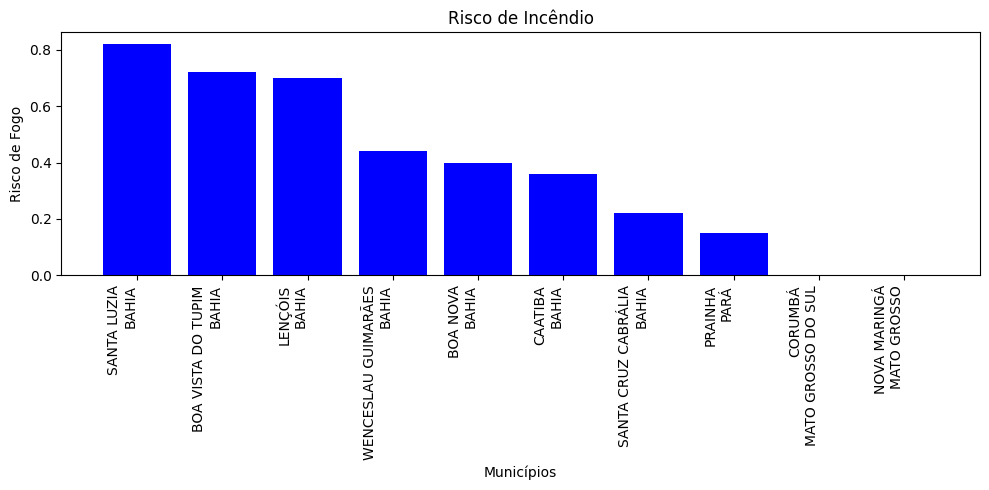

In [28]:
# Ordenar o DataFrame pelo risco de fogo
risco_fogo = risco_fogo.sort_values(by='risco_fogo', ascending=False)

risco_fogo['municipio_estado'] = risco_fogo['municipio'] + '\n' + risco_fogo['estado']

# Criar o gráfico de barras
plt.figure(figsize=(10, 5))  # Tamanho da figura
plt.bar(risco_fogo['municipio_estado'], risco_fogo['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio')
plt.xlabel('Municípios')
plt.ylabel('Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

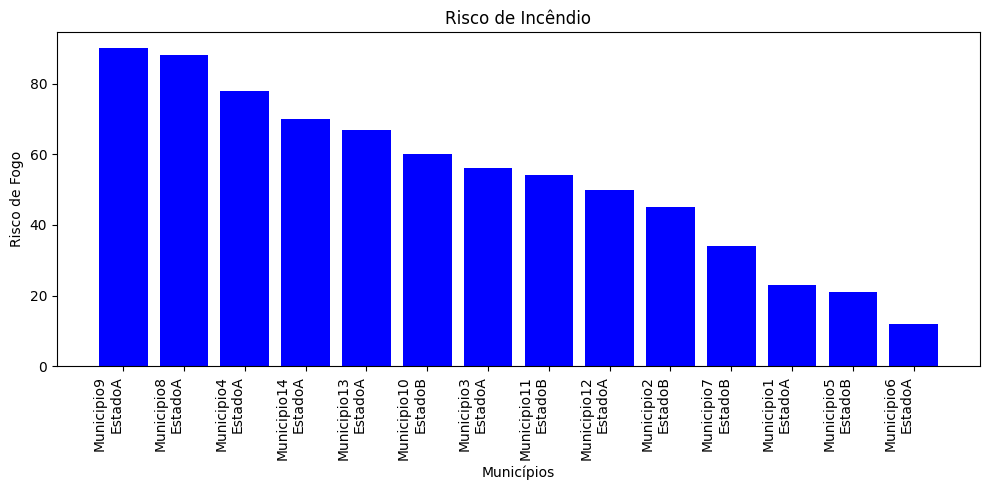

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de dados (substitua pelo seu DataFrame)
data = {
    'municipio': ['Municipio1', 'Municipio2', 'Municipio3', 'Municipio4', 'Municipio5', 'Municipio6', 'Municipio7', 'Municipio8', 'Municipio9', 'Municipio10', 'Municipio11', 'Municipio12', 'Municipio13', 'Municipio14'],
    'risco_fogo': [23, 45, 56, 78, 21, 12, 34, 88, 90, 60, 54, 50, 67, 70],
    'estado': ['EstadoA', 'EstadoB', 'EstadoA', 'EstadoA', 'EstadoB', 'EstadoA', 'EstadoB', 'EstadoA', 'EstadoA', 'EstadoB', 'EstadoB', 'EstadoA', 'EstadoA', 'EstadoA']
}
risco_fogo = pd.DataFrame(data)

# Remover duplicatas com base na coluna 'municipio'
risco_fogo = risco_fogo.drop_duplicates(subset=['municipio'])

# Concatenar o nome do município com o estado
risco_fogo['municipio_estado'] = risco_fogo['municipio'] + '\n' + risco_fogo['estado']

# Ordenar o DataFrame pelo risco de fogo em ordem decrescente
risco_fogo = risco_fogo.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras com os dados concatenados
plt.figure(figsize=(10, 5))  # Tamanho da figura
plt.bar(risco_fogo['municipio_estado'], risco_fogo['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio')
plt.xlabel('Municípios')
plt.ylabel('Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [11]:
precipitacao = focos_mensal_dados[['precipitacao']]
display(precipitacao.describe())
display(precipitacao)



,precipitacao
count,152585.000000
mean,1.313675
std,4.676683
min,0.000000
25%,0.000000
50%,0.000000
75%,0.300000
max,230.900000


,precipitacao
0,1.38
1,1.73
2,14.42
3,12.93
4,12.93
...,...
152580,0.00
152581,2.91
152582,0.00
152583,0.00


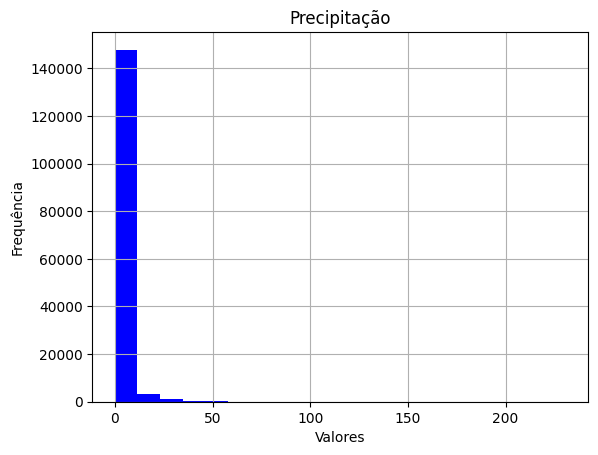

In [17]:
precipitacao.hist(bins=20, alpha=1, color='blue')

plt.title('Precipitação')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.show()

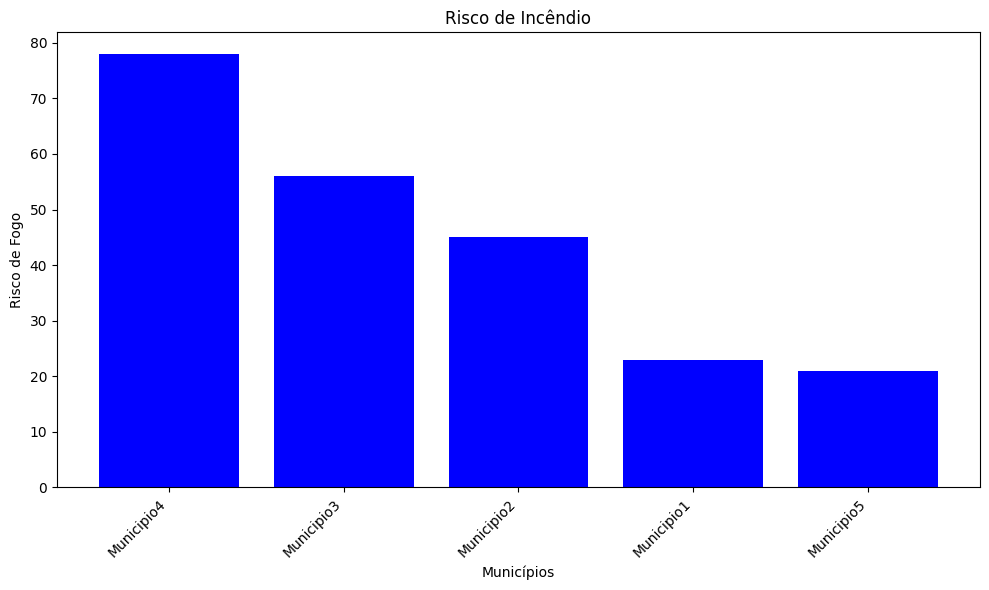

In [24]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame 'risco_fogo' com as colunas 'municipio' e 'risco'
data = {
    'municipio': ['Municipio1', 'Municipio2', 'Municipio3', 'Municipio4', 'Municipio5'],
    'risco': [23, 45, 56, 78, 21]
}
risco_fogo = pd.DataFrame(data)

# Ordenar o DataFrame pelo risco de fogo (opcional)
risco_fogo = risco_fogo.sort_values(by='risco', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.bar(risco_fogo['municipio'], risco_fogo['risco'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio')
plt.xlabel('Municípios')
plt.ylabel('Risco de Fogo')

# Rotacionar os rótulos do eixo x se necessário
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()
